<a href="https://colab.research.google.com/github/VINY1958/UMSA/blob/main/rg_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

# **Regresión**


# ***Arbol de Regresión***

***Supóngase que el departamento de ventas de una empresa quiere estudiar la influencia que tiene la publicidad a través de distintos canales sobre el número de ventas de un producto. Se dispone de un conjunto de datos que contiene los ingresos (en millones) conseguido por ventas en 200 regiones, así como la cantidad de presupuesto, también en millones, destinado a anuncios por radio, TV y periódicos en cada una de ellas.***


## **Bibliotecas**

### **Instalando bibliotecas**

In [1]:
!pip install plotly --upgrade

### **Análisis de datos**

In [2]:
import numpy as np
import pandas as pd
from math import sqrt

### **Gráficos**

In [3]:
import plotly.express as px
import matplotlib.pyplot as plt

### **Preprocesado y modelado**

#### **Con Scikit-learn**

In [4]:
import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [171]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error

In [169]:
import warnings
warnings.filterwarnings('ignore')

## **Conjunto de Datos**

In [5]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/publicidad_multiple.csv"

## ***Dataframe***

In [6]:
datos = pd.read_csv(url, index_col = 0)

In [7]:
datos.head(10)

,ventas,radio,tv,periodico
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## **Relación entre variables**

***El primer paso a la hora de establecer un modelo lineal múltiple es estudiar la relación que existe entre variables. Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, y para detectar colinealidad entre predictores. A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas.***

In [8]:
corr_matrix = round(datos.corr(),3)

### **Matriz de correlaciones**

In [9]:
px.imshow(corr_matrix,
          title = "Matriz de correlacion",
          text_auto = True,
          template = "gridon",
          labels={"color":"Coeficiente"})

### **Gráfico de distribución para cada variable numérica**

In [10]:
datos.columns

Index(['ventas', 'radio', 'tv', 'periodico'], dtype='object')

In [11]:
datos.columns[1:4]

Index(['radio', 'tv', 'periodico'], dtype='object')

In [12]:
for i in datos.columns[1:4]:
  fig = px.scatter(datos,
                   x = i,
                   y = datos.ventas,
                   template = "gridon",
                   title = i)

  fig.show()

## ***Ajuste del modelo***

**Se ajusta un modelo lineal múltiple con el objetivo de predecir las ventas en función de la inversión en los tres canales de publicidad.**


### **División de los datos en train y test**

In [13]:
X = datos[["radio","tv","periodico"]]
y = datos[["ventas"]]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 12345)

### **Creación del modelo**

In [15]:
modelo = DecisionTreeRegressor(max_depth=3, random_state=0)
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [16]:
modelo

DecisionTreeRegressor(max_depth=3, random_state=0)

In [17]:
modelo.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

#### ***Información del modelo***

In [18]:
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Coeficiente de determinación R^2: 0.7818883644643493


### **Predicción**

In [19]:
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

[253.48823529 132.99230769  62.77058824]


In [20]:
X_test["Ventas"] = y_test
X_test["Prediccion"] = predicciones
X_test.head(9)

,radio,tv,periodico,Ventas,Prediccion
52,41.7,39.6,22.6,216.4,253.488235
157,1.3,24.3,10.1,149.8,132.992308
135,47.0,8.5,11.6,48.3,62.770588
140,17.0,12.9,10.9,73.4,62.770588
56,28.1,41.4,5.5,7.3,15.830769
95,31.6,52.9,16.9,163.3,162.046667
54,28.8,15.9,20.2,262.7,253.488235
50,3.1,34.6,11.4,199.8,132.992308
17,39.6,55.8,24.4,281.4,253.488235


### **Evaluacion del modelo**

#### **Error de la media de los cuadrados - MSE**

In [21]:
round(sqrt(mean_squared_error(y_test, predicciones)),3)

46.699

#### **Error de la media absoluta - MAE**


In [22]:
round(metrics.median_absolute_error(y_test, predicciones),3)

21.172

#### **Coeficiente de determinación ($R^2$)**


In [23]:
round(metrics.r2_score(y_test, predicciones),3)

0.757

## **Graficando el modelo**

In [24]:
print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

Profundidad del árbol: 3
Número de nodos terminales: 8


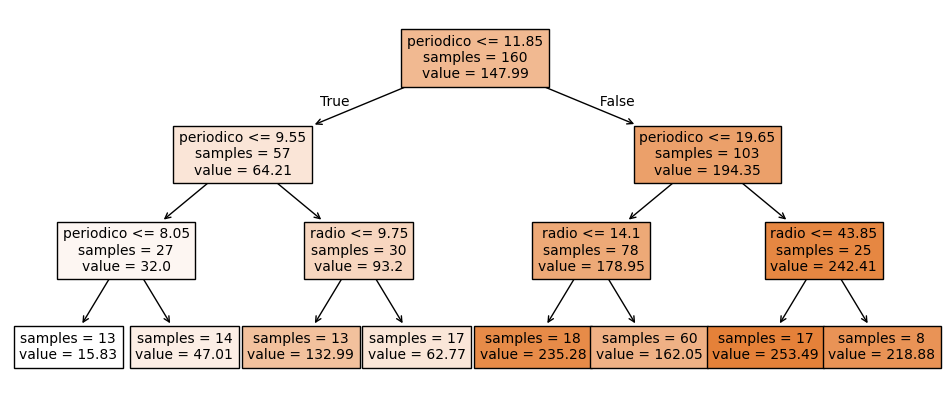

In [173]:
fig, ax = plt.subplots(figsize=(12, 5))

plot = plot_tree(
            decision_tree = modelo,
            feature_names = datos.drop(columns = "ventas").columns,
            class_names   = datos.ventas,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax)

## **Importancia de predictores**

**La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el mse, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.**

In [30]:
importancia_predictores = pd.DataFrame(
                            {'predictor': datos.drop(columns = "ventas").columns,
                             'importancia': modelo.feature_importances_})

print(" ")
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores.sort_values('importancia', ascending=False)

 
Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,periodico,0.866105
0,radio,0.133895
1,tv,0.000000


In [115]:
modelo = modelo.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 33.59260590390003
MSE: 2180.8052228044044
RMSE: 46.69909231242514
MEDIAN ABSOLUTE ERROR: 21.172115384615385
Coeficiente de determinación R^2: 0.7818883644643493
Explained_variance_score: 0.7882027826698654
Max Error: 143.7076923076923


###Optimizacion Arbol de Decision

In [163]:
params = {'criterion': ['squared_error'], 'splitter': ['best'], 'max_depth': [None], 'min_samples_split': [2], 'min_samples_leaf': [1]
, 'min_weight_fraction_leaf': [0.0], 'max_features': [None], 'random_state': [None], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0]
, 'ccp_alpha': [0.0]}


In [160]:
grid = GridSearchCV(estimator=modelo, param_grid=params, cv=5)


In [161]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=3, random_state=0),
             param_grid={'ccp_alpha': [0.0], 'criterion': ['squared_error'],
                         'max_depth': [3], 'max_features': [None],
                         'max_leaf_nodes': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'random_state': [None], 'splitter': ['best']})

In [165]:
grid =  GridSearchCV(estimator=modelo, param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, grid.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", grid.score(X, y))


MAE: 17.314999999999998
MSE: 710.3799999999999
RMSE: 26.65295480805083
MEDIAN ABSOLUTE ERROR: 10.100000000000001
Coeficiente de determinación R^2: 0.9806280124248081


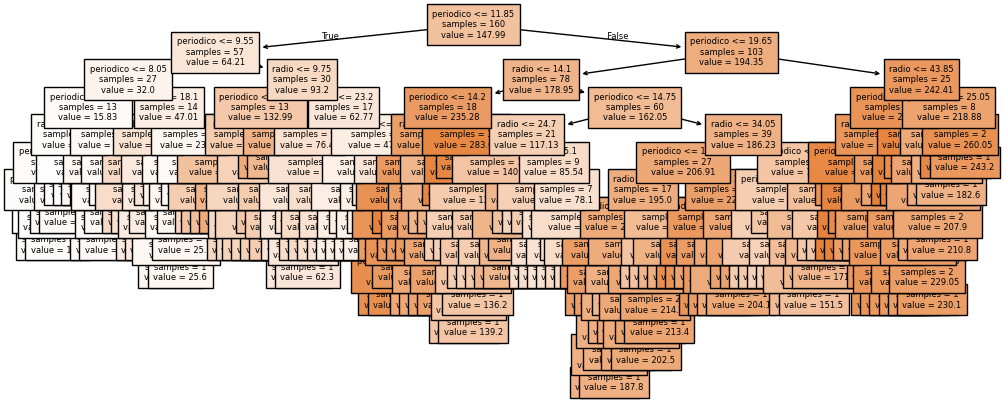

In [172]:
fig, ax = plt.subplots(figsize=(12, 5))


plot = plot_tree(
            decision_tree = grid.best_estimator_,
            feature_names = datos.drop(columns = "ventas").columns,
            class_names   = datos.ventas,
            filled        = True,
            impurity      = False,
            fontsize      = 6,
            precision     = 2,
            ax            = ax)

## **Algoritmos**

##Modelo_1= bosque aleatorio

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

modelo = DecisionTreeRegressor(max_depth=3, random_state=0)

In [78]:
modelo1 = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=0)


In [79]:
modelo1.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [80]:
modelo1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [81]:
print("Coeficiente de determinación R^2:", modelo1.score(X, y))

Coeficiente de determinación R^2: 0.6932627285022459


In [116]:
modelo1 = modelo1.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo1.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo1.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 45.39610879411633
MSE: 3353.260876846286
RMSE: 57.907347347692294
MEDIAN ABSOLUTE ERROR: 34.07471895822856
Coeficiente de determinación R^2: 0.6932627285022459
Explained_variance_score: 0.6553194423076861
Max Error: 143.05910461914456


In [55]:
round(sqrt(mean_squared_error(y_test, predicciones)),3)

30.547

#Modelo_2 = GradientBoostingRegressor

In [43]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
modelo2 = GradientBoostingRegressor(n_estimators=100,max_depth=2, random_state=0)

In [46]:
modelo2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(max_depth=2, random_state=0)

In [47]:
modelo2.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [48]:
print("Coeficiente de determinación R^2:", modelo2.score(X, y))

Coeficiente de determinación R^2: 0.9513329326711035


In [56]:
predicciones2 = modelo2.predict(X_test[['radio', 'tv', 'periodico']])
print(predicciones2[0:3,])

[220.92162461 103.37823289  46.53441296]


In [57]:
round(sqrt(mean_squared_error(y_test, predicciones2)),3)

30.547

In [58]:
round(metrics.median_absolute_error(y_test, predicciones2),3)

19.239

In [117]:
modelo2 = modelo2.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo2.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 22.74762422434423
MSE: 933.1237329837386
RMSE: 30.547074049468936
MEDIAN ABSOLUTE ERROR: 19.238624014503205
Coeficiente de determinación R^2: 0.9513329326711035
Explained_variance_score: 0.9013130032039502
Max Error: 113.65279617979812


##Modelo_3 = AdaBoostRegressor

In [59]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [60]:
modelo3 = AdaBoostRegressor(random_state=0, n_estimators=100)
modelo3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostRegressor(n_estimators=100, random_state=0)

In [61]:
print("Coeficiente de determinación R^2:", modelo3.score(X, y))

Coeficiente de determinación R^2: 0.9143150616872552


In [62]:
predicciones3 = modelo3.predict(X_test[['radio', 'tv', 'periodico']])
print(predicciones2[0:3,])

[220.92162461 103.37823289  46.53441296]


In [63]:
round(sqrt(mean_squared_error(y_test, predicciones3)),3)

29.563

In [64]:
round(metrics.median_absolute_error(y_test, predicciones3),3)

22.162

In [69]:
warnings.filterwarnings('ignore')

In [118]:
modelo3 = modelo3.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo2.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo3.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo3.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 24.898256332153842
MSE: 847.8624008913976
RMSE: 30.547074049468936
MEDIAN ABSOLUTE ERROR: 21.993103448275846
Coeficiente de determinación R^2: 0.9118279981341605
Explained_variance_score: 0.9056012528791435
Max Error: 76.89999999999998


## Modelo_4= ExtraTreesRegressor

In [85]:
from sklearn.ensemble import ExtraTreesRegressor

In [86]:
modelo4 = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(
   X_train, y_train)

In [87]:
modelo4

ExtraTreesRegressor(random_state=0)

In [119]:
modelo4 = modelo4.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo4.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo4.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 10.255974999999994
MSE: 242.74483227499977
RMSE: 15.580270609812905
MEDIAN ABSOLUTE ERROR: 5.784999999999767
Coeficiente de determinación R^2: 0.9933803740606811
Explained_variance_score: 0.9743107731199276
Max Error: 55.38199999999992


##Modulo5 == HistGradientBoostingRegressor

In [89]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [96]:
modelo5 = HistGradientBoostingRegressor(max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.0).fit(X, y)

In [97]:
modelo5

HistGradientBoostingRegressor()

In [123]:
modelo5 = modelo5.fit(X_train, y_train)
print("MAE:", metrics.mean_absolute_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("MSE:", mean_squared_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("RMSE:", sqrt(mean_squared_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']]))))
print("MEDIAN ABSOLUTE ERROR:", metrics.median_absolute_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("Coeficiente de determinación R^2:", modelo5.score(X, y))
print ("Explained_variance_score:", metrics.explained_variance_score(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))
print("Max Error:", max_error(y_test, modelo5.predict(X_test[['radio', 'tv', 'periodico']])))

MAE: 23.283235505463153
MSE: 939.0113945044271
RMSE: 30.64329281432443
MEDIAN ABSOLUTE ERROR: 17.608254914273378
Coeficiente de determinación R^2: 0.9530505888855769
Explained_variance_score: 0.9073664059399849
Max Error: 75.00690236918436


##Comparacion de  Modelos

In [126]:
def evaluate_models(models, X_train, y_train, X_test, y_test, feature_names):
    # ... (rest of the function remains the same)
    # Add at least one indented line of code here as part of the function body
    # You can start by simply adding 'pass' if the function isn't implemented yet
    pass

# Define the models list
models = [modelo1, modelo2, modelo3, modelo4, modelo5]

# Now call the function with the defined models list
evaluate_models(models=models,
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                feature_names=['radio', 'tv', 'periodico']) # Assuming these are your feature names

In [133]:
def evaluate_models(models, X_train, y_train, X_test, y_test, feature_names):
    for i, model in enumerate(models):
        # Fit the model on training data (assuming it's not already fitted)
        model.fit(X_train, y_train)

        # Make predictions on the testing data
        # Use the feature_names argument here
        y_pred = model.predict(X_test[feature_names])

        # Calculate and print performance metrics
        print(f"\nModel {i+1} Performance:")
        print(f"MAE:", mean_absolute_error(y_test, y_pred))
        print(f"MSE:", mean_squared_error(y_test, y_pred))
        print("Coeficiente de determinación R^2:", r2_score(y_test, y_pred))
        # ... (rest of the metrics) ...

# When calling evaluate_models, make sure to provide feature_names
evaluate_models(models=[modelo1, modelo2, modelo3, modelo4, modelo5],
                X_train=X_train, y_train=y_train,
                X_test=X_test, y_test=y_test,
                feature_names=['radio', 'tv', 'periodico'])


Model 1 Performance:
MAE: 45.39610879411633
MSE: 3353.260876846286
Coeficiente de determinación R^2: 0.626142448240613

Model 2 Performance:
MAE: 22.74762422434423
MSE: 933.1237329837386
Coeficiente de determinación R^2: 0.8959653402720112

Model 3 Performance:
MAE: 24.898256332153842
MSE: 847.8624008913976
Coeficiente de determinación R^2: 0.9054711896665163

Model 4 Performance:
MAE: 10.255974999999994
MSE: 242.74483227499977
Coeficiente de determinación R^2: 0.9729361979191056

Model 5 Performance:
MAE: 23.283235505463153
MSE: 939.0113945044271
Coeficiente de determinación R^2: 0.8953089205055352
